In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Input Data

In [10]:
palette = {
    'Forest Formation':'#006400', 
    'Pasture':'#ffd966', 
    'Agriculture':'#e974ed', 
    'Grassland':'#b8af4f',
    'Savanna Formation':'#00ff00',
    'Wetland':'#45c2a5' 
}

classes = '","'.join(list(dict(palette).keys()))

df_samples = pd.read_csv('../data/samples.csv')
df_samples['ITEM'] = 1
df_samples['PR'] = df_samples.apply(lambda serie: str(serie['PR']), 1)

# n samples by PR and LEGEND
df_samples_class = df_samples.groupby(by=['PR', 'YEAR','LEGEND']).count()
df_samples_class = df_samples_class.reset_index().rename(columns={'Unnamed: 0': 'N_SAMPLES'})
df_samples_class = df_samples_class[['PR', 'YEAR','LEGEND', 'N_SAMPLES']]

# n samples by PR
df_samples_by_pr = df_samples_class.groupby(by=['PR', 'YEAR']).sum()\
    .reset_index()\
    .drop_duplicates(subset=['N_SAMPLES'])\
    .sort_values(by=['YEAR','N_SAMPLES'])[['PR','N_SAMPLES']]


# identificar PR com amostras de classes com baixa representatividade


df_samples_by_pr


,PR,N_SAMPLES
222,227062,558
37,224060,655
259,228061,862
148,225060,1012
0,223062,1013
333,231069,1114
185,225066,1406
74,224066,1661
111,224068,1871
296,230069,2581


### Chart

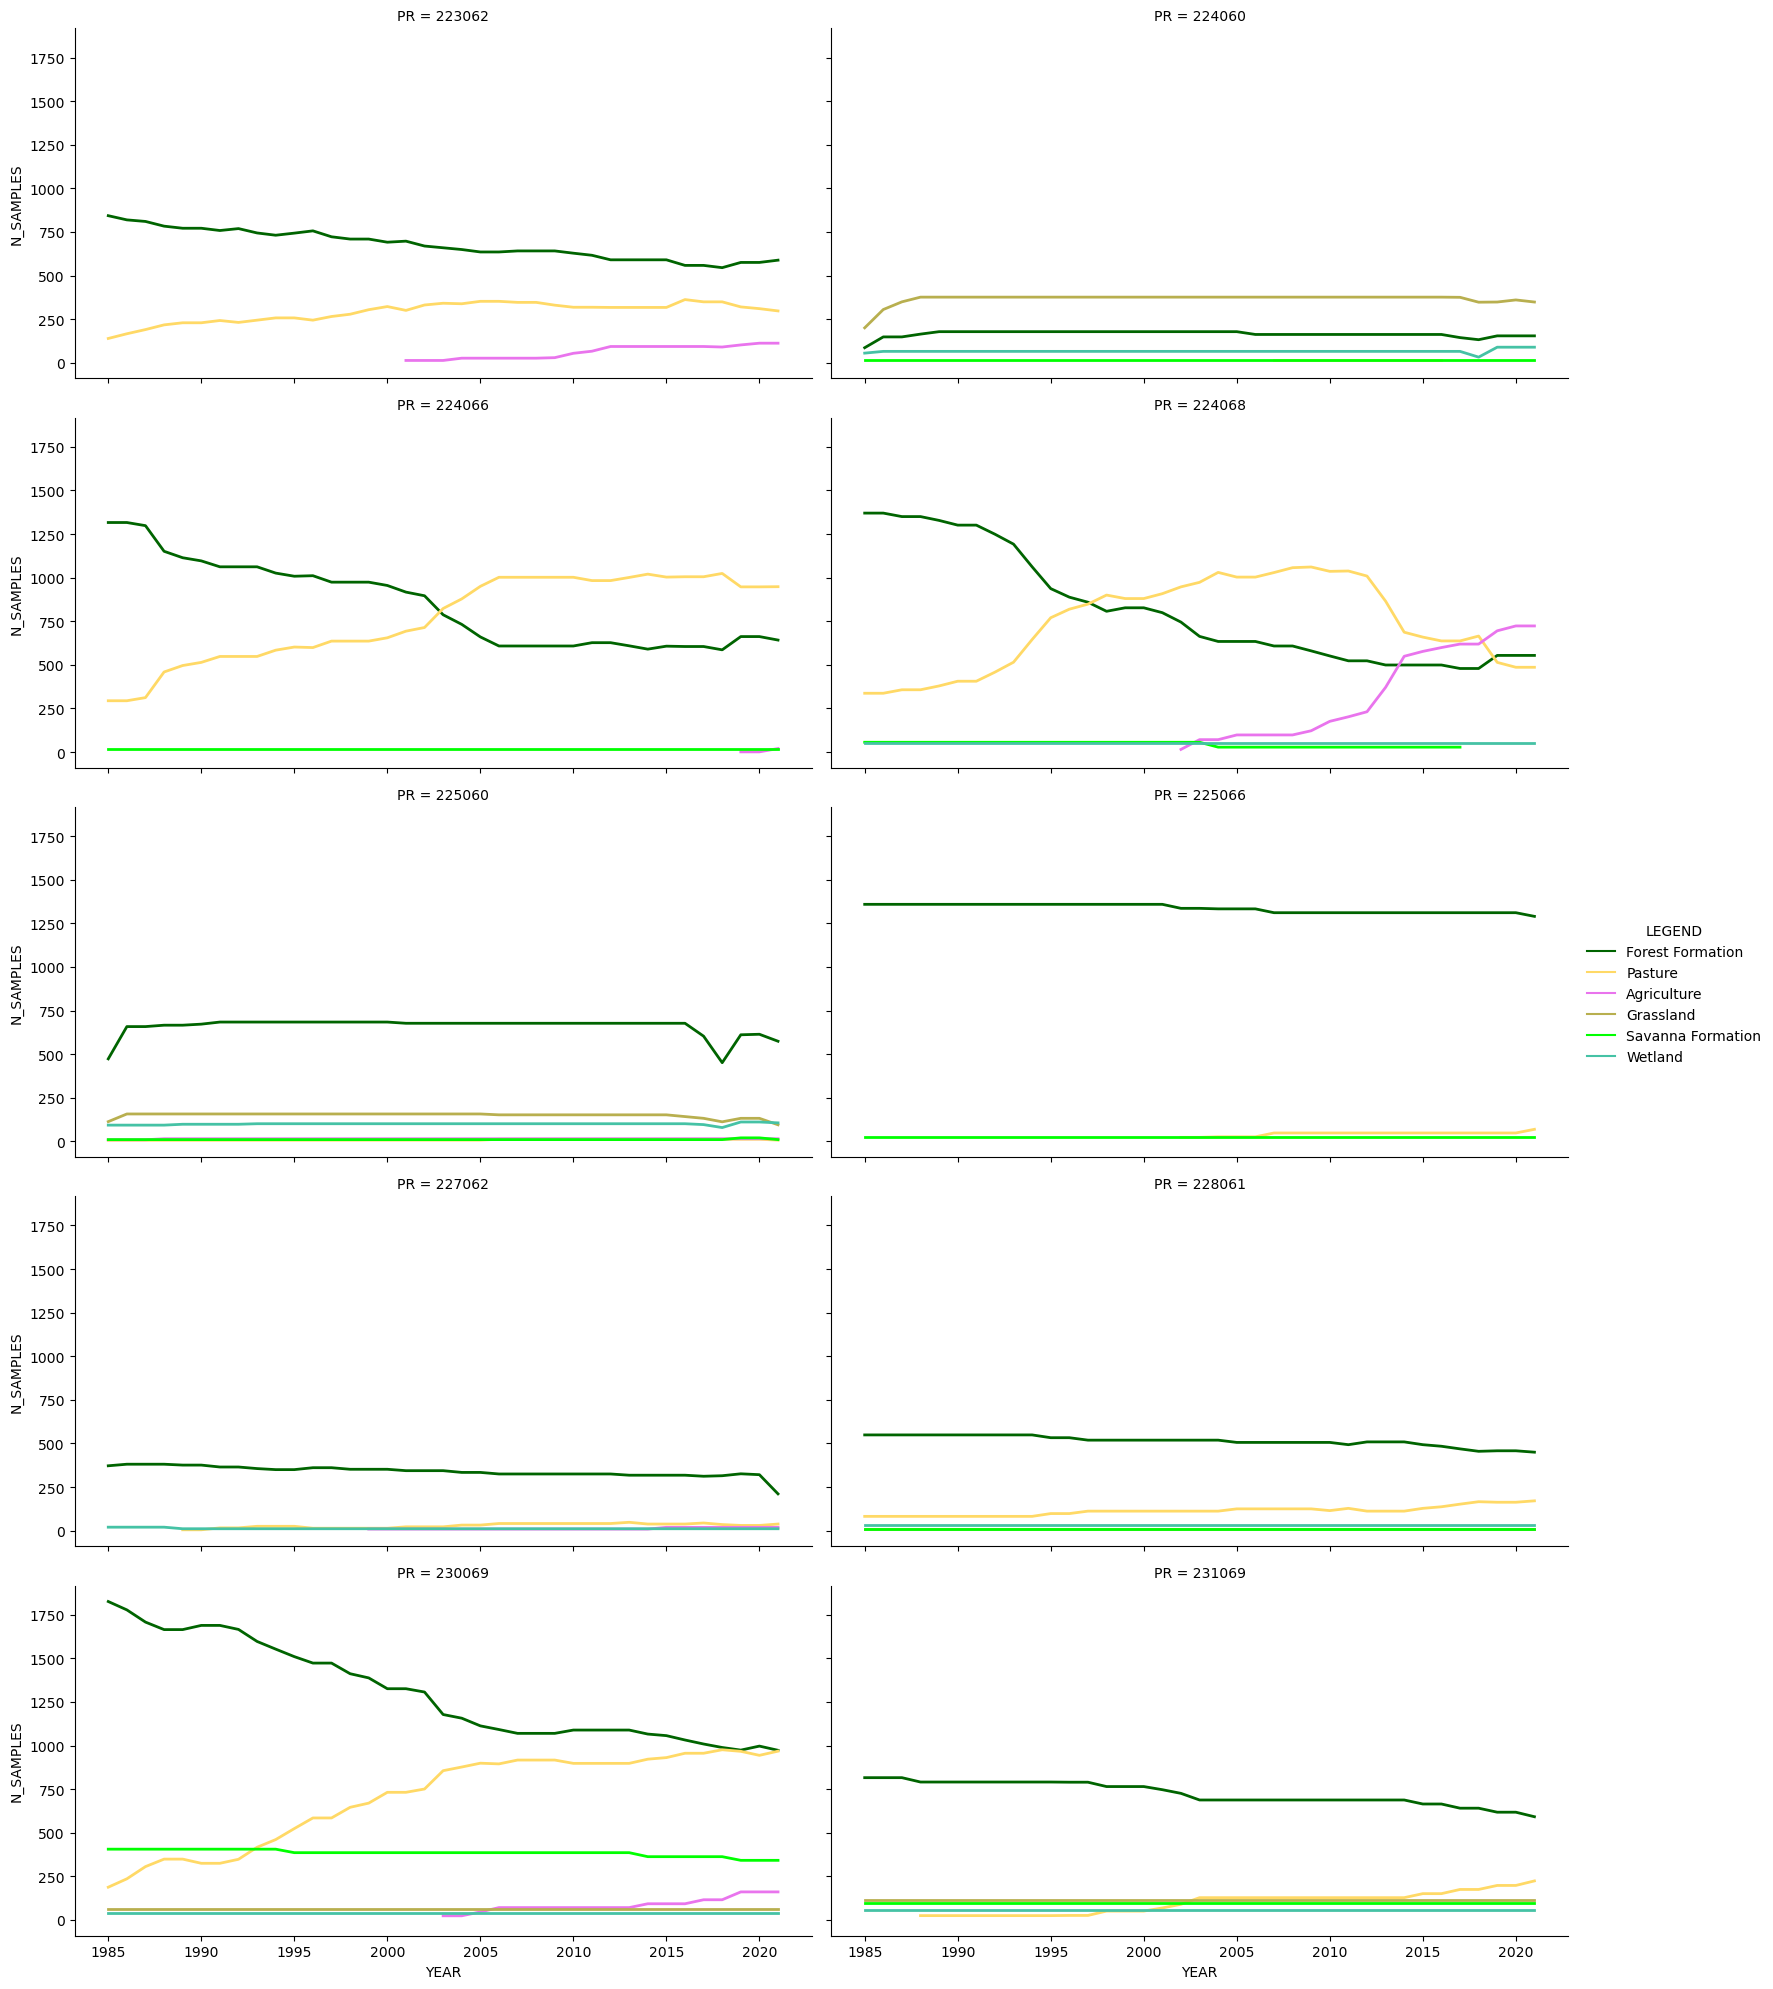

In [3]:

df_samples_class = df_samples_class.query('LEGEND in ("{}")'.format(classes))

g = sns.relplot(
    data=df_samples_class, x="YEAR", y="N_SAMPLES", col="PR", 
    hue='LEGEND',
    aspect=2, 
    linewidth = 2,
    palette=list(dict(palette).values()),
    kind="line", height=4, col_wrap=2, #facet_kws={'sharey':False},
)
